# Trabajo práctico integrador: Análisis de datos

Integrantes:
* Braga Diego
* Donadello Julio
* Echeverría Eduardo
* Isidro Marco
* Sarina Diego

## Introducción

Para el presente trabajo se utilizó un dataset sobre el clima en Australia, el cual contiene información sobre diferentes ciudades de Australia, incluyendo datos como la temperatura, la velocidad y dirección del viento, las precipitaciones, entre otros.

Dataset utilizado: [Kaggle - Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)

El dataset contiene las siguientes columnas:
* **Date:** fecha de la observación.
* **Location:** nombre de la ubicación de la estación meteorológica.
* **MinTemp:** temperatura mínima en grados Celsius.
* **MaxTemp:** temperatura máxima en grados Celsius.
* **Rainfall:** precipitaciones durante el día en mm.
* **Evaporation:** evaporación en mm durante 24h hasta las 9am.
* **Sunshine:** horas de sol en el día.
* **WindGustDir:** dirección de la ráfaga de viento más fuerte.
* **WindGustSpeed:** velocidad de la ráfaga de viento más fuerte en km/h.
* **WindDir9am:** dirección del viento a las 9am.
* **WindDir3pm:** dirección del viento a las 3pm.
* **WindSpeed9am:** velocidad del viento promediando los 10 minutos previos a las 9am en km/h.
* **WindSpeed3pm:** velocidad del viento promediando los 10 minutos previos a las 3pm en km/h.
* **Humidity9am:** humedad a las 9am en porcentaje.
* **Humidity3pm:** humedad a las 3pm en porcentaje.
* **Pressure9am:** presión a las 9am en hpa.
* **Pressure3pm:** presión a las 3pm en hpa.
* **Cloud9am:** Fracción del cielo cubierta por nubes a las 9am en oktas.
* **Cloud3pm:** Fracción del cielo cubierta por nubes a las 3pm en oktas.
* **Temp9am:** temperatura a las 9am en grados Celsius.
* **Temp3pm:** temperatura a las 3pm en grados Celsius.
* **RainToday:** si llovió hoy más de 1mm durante 24h hasta las 9am.
* **RainTomorrow:** si lloverá mañana.

Un dato importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si lloverá al día siguiente o no, en función de los datos meteorológicos del día actual.

Antes de comenzar se importan todas las librerías necesarias con el objetivo de brindar claridad al código y facilitar su lectura.

In [63]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats


#configuraciones generales
pd.set_option('display.max_columns', None)

## Análisis exploratorio

In [64]:
#carga de los datos
weather_df = pd.read_csv("./dataset/weatherAUS.csv")

#cantidad de elementos en el dataset
print(weather_df.shape)

(145460, 23)


In [65]:
# Visualizacion de las primeras 10 filas
weather_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [66]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


En base a los datos presentados hasta ahora se pueden destacar los siguientes puntos:
* El dataset contiene 145460 registros y 23 columnas.
* Las únicas columnas con valores negativos son MinTemp, MaxTemp, Temp9am y Temp3pm. Lo cual es correcto ya que la temperatura puede ser negativa a diferencia de las variables restantes.
* La mayoría de las columnas tienen datos faltantes. Las columnas con mayor cantidad de datos faltantes son Sunshine, Evaporation, Cloud3pm y Cloud9am.


In [67]:
#análisis rápido de los tipos de datos de cada variable
weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Identificación de tipos de datos y su utilidad

Para comenzar con el análisis exploratorio de los datos, se procede a identificar los tipos de datos de cada columna y su utilidad para el análisis. Clasificando las columnas en datos cualitativos y cuantitativos, con sus respectivas subcategorías.

Se adelante una tabla con la clasificación de las variables a modo de conclusión del análisis.

| Variable | Tipo de dato | Subcategoría | Escala de medida |
| --- | --- | --- | --- |
| Date | - | - | - |
| Location | Cualitativa | - | Nominal |
| MinTemp | Cuantitativa | Continua | de intervalo |
| MaxTemp | Cuantitativa | Continua | de intervalo |
| Rainfall | Cuantitativa | Continua | de razón |
| Evaporation | - | - | - |
| Sunshine | - | - | - |
| WindGustDir | - | - | - |
| WindGustSpeed | Cuantitativa | Continua | de razón |
| WindDir9am | - | - | - |
| WindDir3pm | - | - | - |
| WindSpeed9am | Cuantitativa | Continua | de razón |
| WindSpeed3pm | Cuantitativa | Continua | de razón |
| Humidity9am | Cuantitativa | Continua | de razón |
| Humidity3pm | Cuantitativa | Continua | de razón |
| Pressure9am | - | - | - |
| Pressure3pm | - | - | - |
| Cloud9am | - | - | - |
| Cloud3pm | - | - | - |
| Temp9am | Cuantitativa | Continua | de intervalo |
| Temp3pm | Cuantitativa | Continua | de intervalo |
| RainToday | - | - | - |
| RainTomorrow | - | - | - |


#### Análisis variable por variable

##### Date

##### Location

La variable Location es una variable cualitativa nominal que indica la ubicación de la estación meteorológica.

In [68]:
print('Valores únicos: ', weather_df['Location'].unique())
print('Cardinalidad: ', len(weather_df['Location'].unique()))

Valores únicos:  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


La variable no presenta errores ni valores faltantes, pero cuanta con un alta cardinalidad, ya que existen 49 ubicaciones diferentes. 

A continuación se gráfica la cantidad de localizaciones utilizadas a lo largo del tiempo.

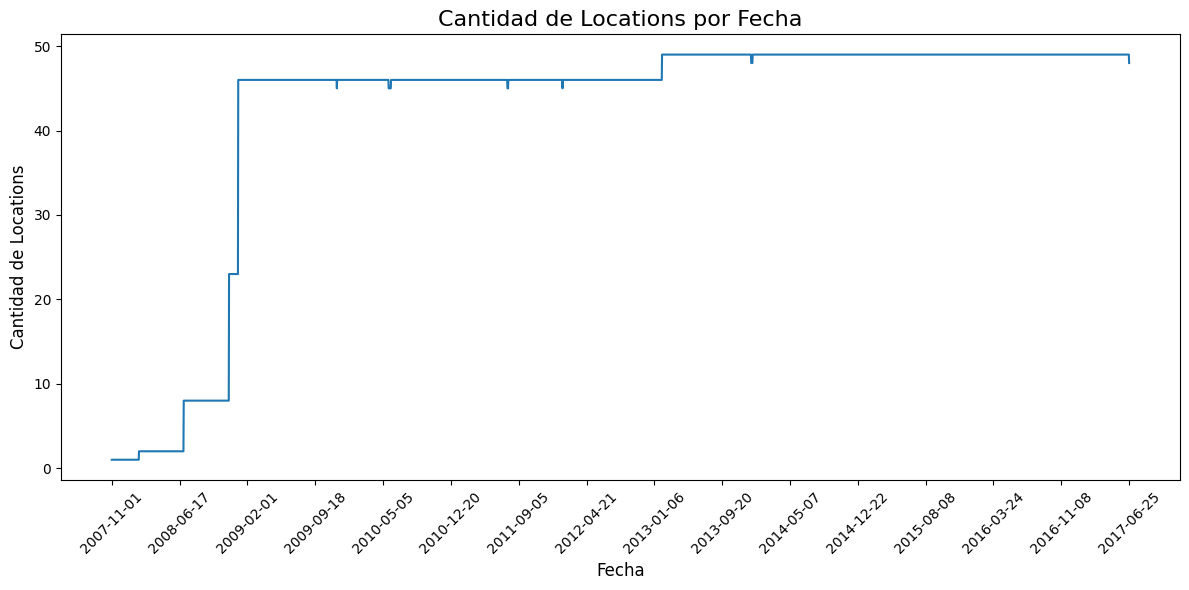

In [69]:
# Se agrupan las Locations por Date.
location_counts = weather_df.groupby('Date')['Location'].count().reset_index()
location_counts.columns = ['Date', 'LocationCount']

# Seleccionar solo un subconjunto de fechas para mostrar
num_dates = 15
dates_to_show = location_counts.iloc[::len(location_counts)//num_dates, :]

plt.figure(figsize=(12, 6))
sns.lineplot(data=location_counts, x='Date', y='LocationCount')
plt.title('Cantidad de Locations por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Locations', fontsize=12)

# Etiquetas del eje x
plt.xticks(ticks=dates_to_show.index, labels=dates_to_show['Date'], rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

En este gráfico se puede observar que en cada observación no necesariamente se tiene información de todas las estaciones meteorológicas (49 en total para el dataset). Esto puede deberse a diversos motivos, como por ejemplo que fueron creándose/habilitándose en el correr del tiempo, o bien hubo inhabilitaciones temporales de las mismas.

##### MinTemp, MaxTemp, Temp9am, Temp3pm

Las variables MinTemp, MaxTemp, Temp9am y Temp3pm son variables cuantitativas continuas de intervalo que indican la temperatura mínima, máxima, a las 9am y a las 3pm respectivamente en grados Celsius.

In [70]:
TEMPERATURE_VARS = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
weather_df[TEMPERATURE_VARS].describe()

,MinTemp,MaxTemp,Temp9am,Temp3pm
count,143975.000000,144199.000000,143693.000000,141851.00000
mean,12.194034,23.221348,16.990631,21.68339
std,6.398495,7.119049,6.488753,6.93665
min,-8.500000,-4.800000,-7.200000,-5.40000
25%,7.600000,17.900000,12.300000,16.60000
50%,12.000000,22.600000,16.700000,21.10000
75%,16.900000,28.200000,21.600000,26.40000
max,33.900000,48.100000,40.200000,46.70000


Se observa que las variables MinTemp, MaxTemp, Temp9am y Temp3pm tienen un rango de valores acorde a la naturalidad de la variable. A continuación se analiza si los valores de MinTemp son siempre menores o iguales a los de MaxTemp.

In [71]:
weather_temp_nonull = weather_df[TEMPERATURE_VARS].dropna()
print("¿Todos los valores de MinTemp son menores o iguales a los de MaxTemp?:", (weather_temp_nonull['MinTemp'] <= weather_temp_nonull['MaxTemp']).all())

¿Todos los valores de MinTemp son menores o iguales a los de MaxTemp?: True


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

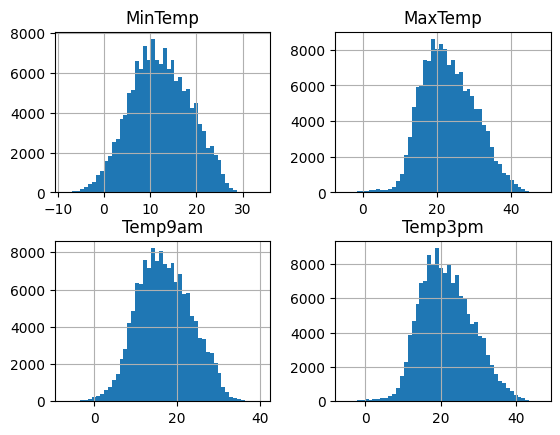

In [72]:
weather_df[TEMPERATURE_VARS].hist(bins=50)

Se aprecia que las cuatro variables se comportan de manera bastante similar y con distribuciones que simple vista parecen aproximarse a la Normal. A continuación se analizarán gráficos QQ para visualizar mejor este ajuste.

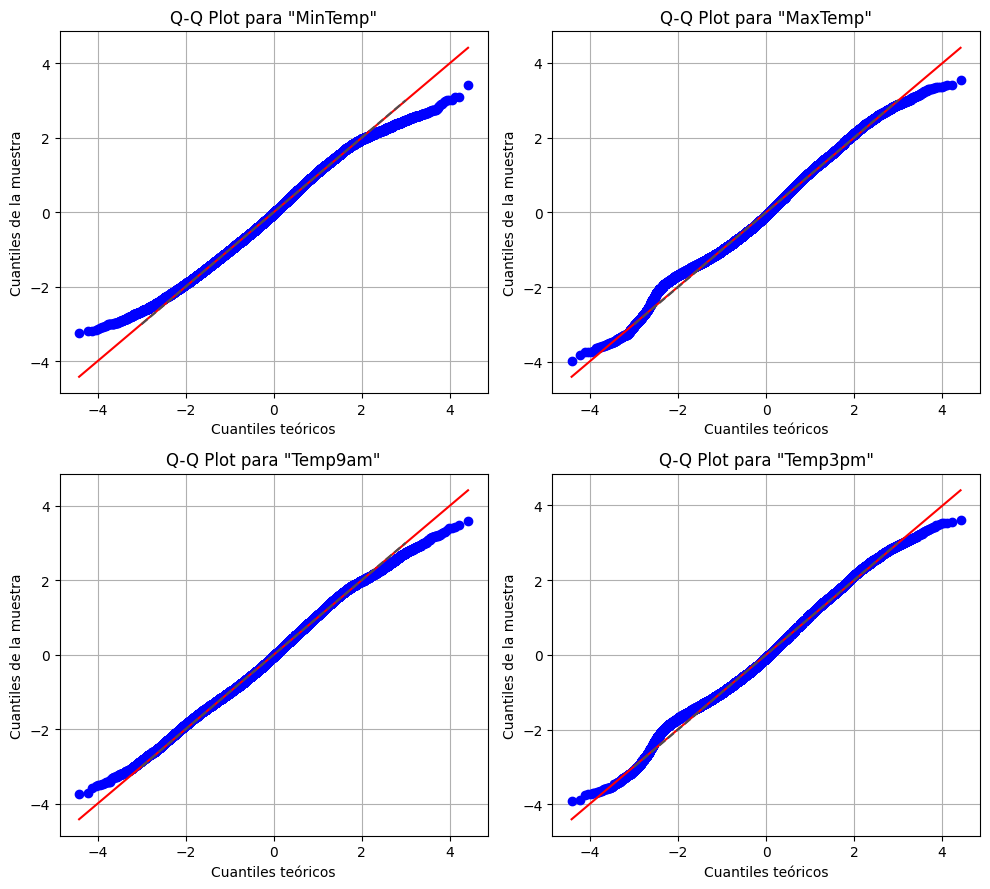

In [88]:
# Calcular datos estandarizados
temp_vars_standarized = (weather_temp_nonull[TEMPERATURE_VARS] - weather_temp_nonull[TEMPERATURE_VARS].mean()) / weather_temp_nonull[TEMPERATURE_VARS].std()

# Crear una figura con cuatro subgráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# Iterar sobre las variables de temperatura y graficar el Q-Q plot en cada subgráfico
for i, var in enumerate(TEMPERATURE_VARS):
    ax = axes[i//2, i%2]
    stats.probplot(temp_vars_standarized[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot para "{var}"')
    ax.set_xlabel('Cuantiles teóricos')
    ax.set_ylabel('Cuantiles de la muestra')
    ax.grid(True)
    ax.plot([-3, 3], [-3, 3], ls="--", c=".3")  # Agregar línea de referencia

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Observando los Q-Q plots se puede observar que para las cuatro variables de temperatura su distribución parece asemejarse bastante a una Normal. Los cuatro casos presentan colas algo livianas.

##### WindGustSpeed, WindSpeed9am, WindSpeed3pm

Las variables WindGustSpeed, WindSpeed9am y WindSpeed3pm son variables cuantitativas continuas de razón que indican la velocidad del viento en km/h.

In [74]:
WIND_SPEED_VARS = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
weather_df[WIND_SPEED_VARS].describe()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,135197.000000,143693.000000,142398.000000
mean,40.035230,14.043426,18.662657
std,13.607062,8.915375,8.809800
min,6.000000,0.000000,0.000000
25%,31.000000,7.000000,13.000000
50%,39.000000,13.000000,19.000000
75%,48.000000,19.000000,24.000000
max,135.000000,130.000000,87.000000


array([[<Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>, <Axes: >]], dtype=object)

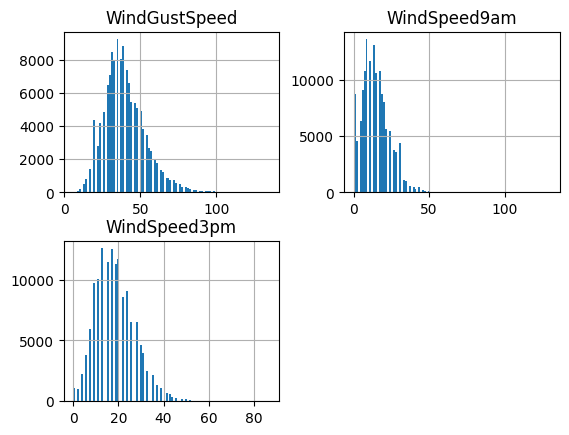

In [75]:
weather_df[WIND_SPEED_VARS].hist(bins=100)

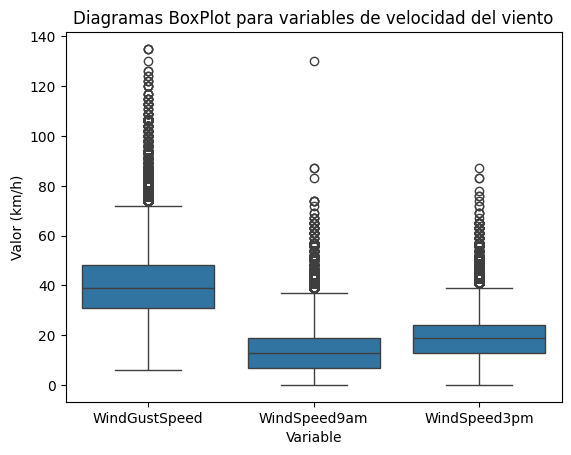

In [76]:
melt_dataset = pd.melt(weather_df)
melt_dataset = melt_dataset[melt_dataset['variable'].isin(WIND_SPEED_VARS)]
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (km/h)'}, axis=1)

# Crear el gráfico de caja
sns.boxplot(data=melt_dataset, x='Variable', y='Valor (km/h)')

# Establecer el título del gráfico
plt.title('Diagramas BoxPlot para variables de velocidad del viento')

# Mostrar el gráfico
plt.show()

A simple vista pueden observarse distribuciones algo oblicuas y con ciertas irregularidades en los valores del histograma. Además se observa que las tres variables presentan valores atípicos, aunque los mismos son físicamente posibles y no parecen ser errores de medición. Tambien es lógico que las variables de WindSpeed9am y WindSpeed3pm tengan valores más bajos que WindGustSpeed, debido a que se restringen a un intervalo de tiempo más corto.

In [77]:
# Se determina qué posibles valores tiene la velocidad del viento en las variables dadas, de forma de encontrar alguna particularidad.
unique_values_WindGustSpeed = weather_df['WindGustSpeed'].unique()
unique_values_WindSpeed9am = weather_df['WindSpeed9am'].unique()
unique_values_WindSpeed3pm = weather_df['WindSpeed3pm'].unique()
unique_values_WindGustSpeed.sort()
unique_values_WindSpeed9am.sort()
unique_values_WindSpeed3pm.sort()

print('Valores únicos para WindGustSpeed: ', unique_values_WindGustSpeed)
print('Valores únicos para WindSpeed9am: ', unique_values_WindSpeed9am)
print('Valores únicos para WindSpeed3pm: ', unique_values_WindSpeed3pm)

Valores únicos para WindGustSpeed:  [  6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.  28.  30.
  31.  33.  35.  37.  39.  41.  43.  44.  46.  48.  50.  52.  54.  56.
  57.  59.  61.  63.  65.  67.  69.  70.  72.  74.  76.  78.  80.  81.
  83.  85.  87.  89.  91.  93.  94.  96.  98. 100. 102. 104. 106. 107.
 109. 111. 113. 115. 117. 120. 122. 124. 126. 130. 135.  nan]
Valores únicos para WindSpeed9am:  [  0.   2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.
  26.  28.  30.  31.  33.  35.  37.  39.  41.  43.  44.  46.  48.  50.
  52.  54.  56.  57.  59.  61.  63.  65.  67.  69.  72.  74.  83.  87.
 130.  nan]
Valores únicos para WindSpeed3pm:  [ 0.  2.  4.  6.  7.  9. 11. 13. 15. 17. 19. 20. 22. 24. 26. 28. 30. 31.
 33. 35. 37. 39. 41. 43. 44. 46. 48. 50. 52. 54. 56. 57. 59. 61. 63. 65.
 67. 69. 72. 74. 76. 78. 83. 87. nan]


Para las tres variables tenemos que los valores, a pesar de corresponder a variables teóricamente continuas, son discretos y no tenemos decimales. Esto explica por qué en el histograma se pueden llegar a ver algunos saltos cuando se tienen muchos bins.

##### Humidity9am, Humidity3pm

Las variables Humidity9am y Humidity3pm son variables cuantitativas continuas de razón que indican la humedad a las 9am y a las 3pm respectivamente en porcentaje.

In [78]:
HUMIDITY_VARS = ['Humidity9am', 'Humidity3pm']
weather_df[HUMIDITY_VARS].describe()

,Humidity9am,Humidity3pm
count,142806.000000,140953.000000
mean,68.880831,51.539116
std,19.029164,20.795902
min,0.000000,0.000000
25%,57.000000,37.000000
50%,70.000000,52.000000
75%,83.000000,66.000000
max,100.000000,100.000000


Se puede observar que el rango de valores de ambas variables es de 0 a 100, lo cual es correcto ya que la humedad se mide en porcentaje.

array([[<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>]], dtype=object)

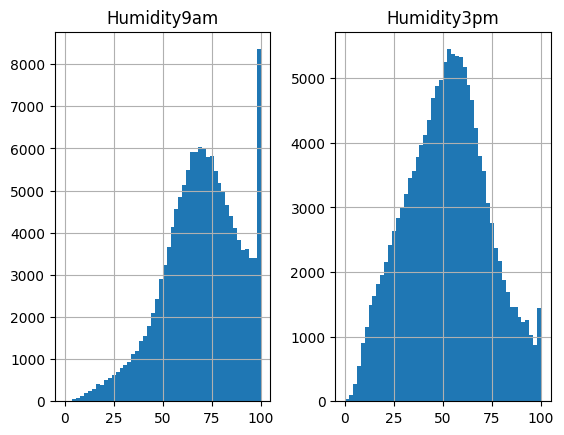

In [85]:
weather_df[HUMIDITY_VARS].hist(bins=50)

En ambos histogramas puede observarse una distribución asimétrica, acumulando muchos valores sobre el extremo derecho. Esto puede deberse a que pasado cierto umbral de medición, el instrumento devuelva siempre el valor máximo o un valor cercano (99% o 100%).
Además, se observa que la variable Humidity9am esta más sesgada a la derecha que la variable Humidity3pm, lo cual tiene sentido que ya que la humedad a las 9am suele ser mayor debido a que el día recién comienza.

##### Pressure9am, Pressure3pm

Las variables Pressure9am y Pressure3pm son variables cuantitativas continuas de razón que indican la presión a las 9am y a las 3pm respectivamente en hpa.

In [86]:
PRESSURE_VARS = ['Pressure9am', 'Pressure3pm']
weather_df[PRESSURE_VARS].describe()

,Pressure9am,Pressure3pm
count,130395.00000,130432.000000
mean,1017.64994,1015.255889
std,7.10653,7.037414
min,980.50000,977.100000
25%,1012.90000,1010.400000
50%,1017.60000,1015.200000
75%,1022.40000,1020.000000
max,1041.00000,1039.600000


array([[<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>]], dtype=object)

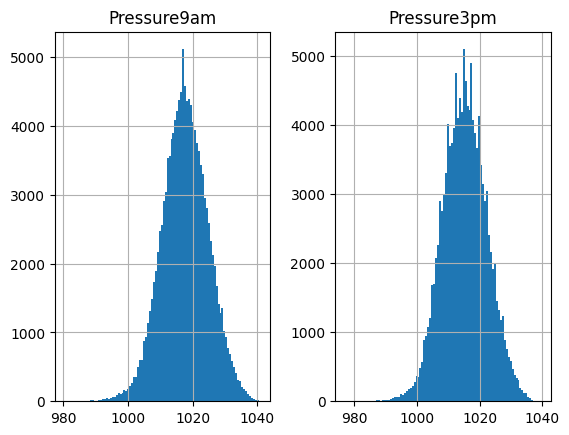

In [87]:
weather_df[PRESSURE_VARS].hist(bins=100)

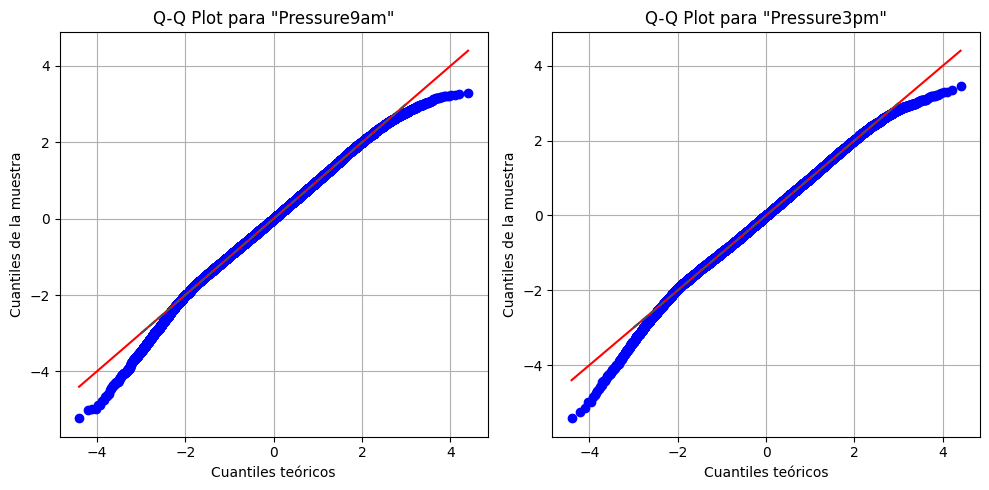

In [95]:
pressure_vars_standarized = (weather_df[PRESSURE_VARS] - weather_df[PRESSURE_VARS].mean())/weather_df[PRESSURE_VARS].std()
pressure_vars_standarized = pressure_vars_standarized.dropna()

# crear gráfico con 2 subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Iterar sobre las variables de temperatura y graficar el Q-Q plot en cada subgráfico
for i, var in enumerate(PRESSURE_VARS):
    ax = axes[i]
    stats.probplot(pressure_vars_standarized[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot para "{var}"')
    ax.set_xlabel('Cuantiles teóricos')
    ax.set_ylabel('Cuantiles de la muestra')
    ax.grid(True)
    ax.plot([-3, 3], [-3, 3], ls="--", c=".3")  # Agregar línea de referencia

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Tal como se puede apreciar en los histogramas como en los gráficos Q-Q, ambas variables presentan distribuciones que se asemejan bastante a la Normal, pero en los dos casos con colas pesadas a la izquierda.

##### Rainfall

La variable Rainfall es una variable cuantitativa continua de razón que indica las precipitaciones durante el día en mm.

In [96]:
weather_df['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

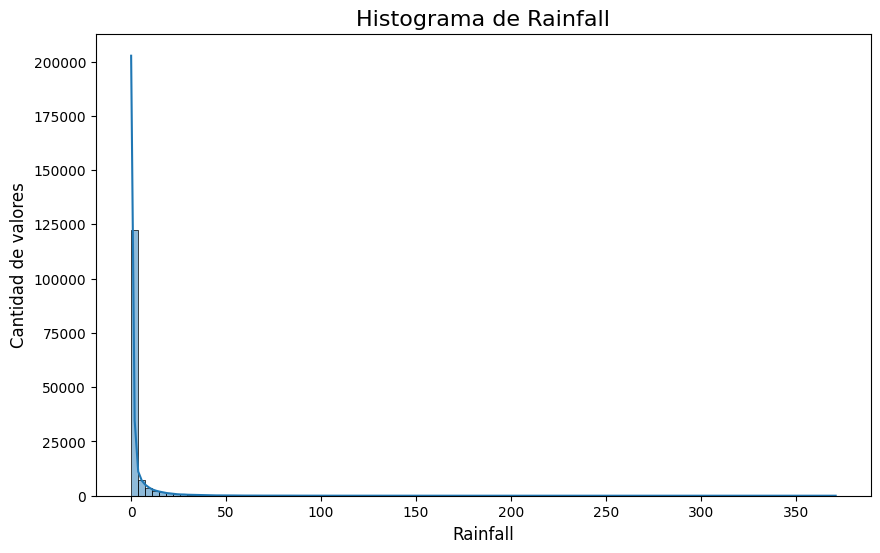

In [112]:
#Graficar cantidad de valores en cada cuartil
plt.figure(figsize=(10, 6))
sns.histplot(data=weather_df, x='Rainfall', bins=100, kde=True)
plt.title('Histograma de Rainfall', fontsize=16)
plt.xlabel('Rainfall', fontsize=12)
plt.ylabel('Cantidad de valores', fontsize=12)
plt.show()

En este caso la distribución de los datos claramente no es normal y se puede apreciar la gran cantidad de días sin acumulados de lluvia registrados en el dataset (la mayoría de las observaciones). Además, se observa que la variable presenta valores atípicos, aunque los mismos son físicamente posibles, pueden perjudicar en el entrenamiento del modelo.

In [110]:
#porcentaje de valores que valen más de 50
rainfall_over_50 = weather_df['Rainfall'][weather_df['Rainfall'] > 50]
rainfall_over_50_percentage = 100 * len(rainfall_over_50) / len(weather_df['Rainfall'])
print(f'Porcentaje de valores de Rainfall mayores a 50: {rainfall_over_50_percentage:.2f}%')

Porcentaje de valores de Rainfall mayores a 50: 0.55%


In [113]:
weather_df['Rainfall'].value_counts()

Rainfall
0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: count, Length: 681, dtype: int64

##### Evaporation

La variable Evaporation es una variable cuantitativa continua de razón que indica la evaporación en mm durante 24h hasta las 9am.

In [114]:
weather_df['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

Se pueden observar una gran cantidad de valores faltantes en la variable, lo cual puede perjudicar en el entrenamiento del modelo y se deberá tener en cuenta al momento de realizar la limpieza de los datos.

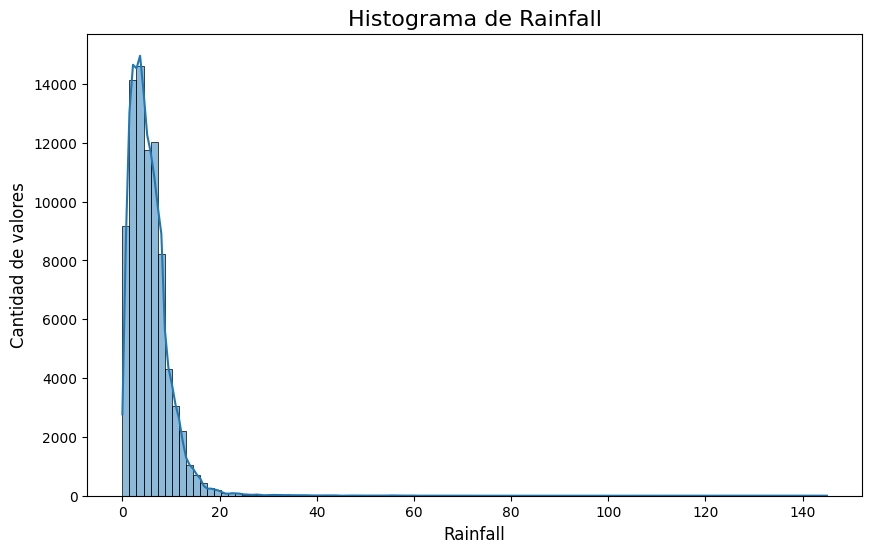

In [116]:
#Graficar cantidad de valores en cada cuartil
plt.figure(figsize=(10, 6))
sns.histplot(data=weather_df, x='Evaporation', bins=100, kde=True)
plt.title('Histograma de Rainfall', fontsize=16)
plt.xlabel('Rainfall', fontsize=12)
plt.ylabel('Cantidad de valores', fontsize=12)
plt.show()

In [ ]:
Se observa una distribución oblicua con una cola más pesada hacia la derecha. A la izquierda está truncada por el valor 0, que es el mínimo que puede tomar.

##### Sunshine

##### WindGustDir, WindDir9am, WindDir3pm

##### Cloud9am, Cloud3pm

##### RainToday, RainTomorrow

## Limpieza de los datos y preparación